In [1268]:
import numpy as np
import pandas as pd
import yfinance as yf
import numpy.random as r
import scipy.stats as stats
import pylab 
import scipy

# Question 1

### a)

In [1290]:
alpha = -0.1
sigma = 0.25
m = 200
T = 2
t = np.arange(0, T + T/m , T/m)

In [1291]:
# In total 201 observation (we start with t_0 up to t_200)
len(t)

201

In [1292]:
# We need to draw 200 N(0,1) to simulate 200 increments
nrand = r.standard_normal(m)

In [1293]:
# At t_0 the value of BM is 0. 

W = list(range(0,m+1))
W[0] = 0

#Then we add previous BM to the increments. In total 200 increments. Note that nrand is with 
# index i-1 because of the counting starting from 0 and the for loop starts at 1.

for i in range(1, m+1):
    W[i] = W[i-1] + sigma * np.sqrt(t[i] - t[i-1]) * nrand[i-1] + alpha * (t[i] - t[i-1])

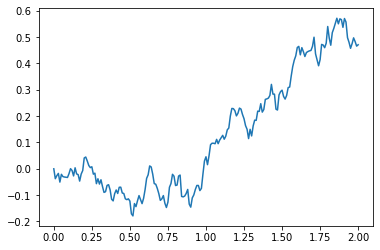

In [1294]:
# Plotting the simulated BM
plt.plot(t, W)

In [1324]:
#Simulating 10 path of BM with same characteristics as before

f = {}
for j in range(1, 11):
    nrand = r.standard_normal(m)
    W = list(range(0,m+1))
    W[0] = 0
    for i in range(1, m+1):
        W[i] = W[i-1] + sigma * np.sqrt(t[i] - t[i-1]) * nrand[i-1] + alpha * (t[i] - t[i-1])
    f["BM{a}".format(a = j)] = W
df2 = pd.DataFrame(f)

<AxesSubplot:>

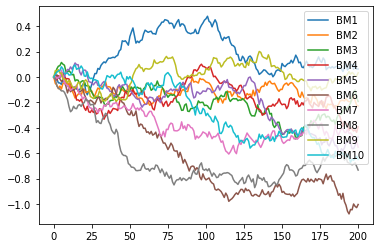

In [1296]:
df2.plot()

<AxesSubplot:>

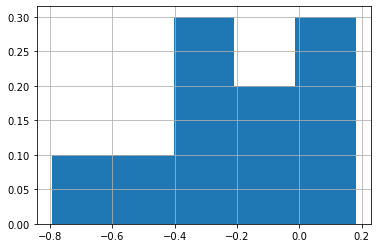

In [1325]:
# Histogram of values at T of 10 paths
df2.iloc[-1].hist(bins = 5, weights=np.zeros_like(df2.iloc[-1]) + 1. / df2.iloc[-1].size)

In [1355]:
#Simulating 1000 path of BM with same characteristics as before

f = {}
for j in range(1, 1001):
    nrand = r.standard_normal(m)
    W = list(range(0,m+1))
    W[0] = 0
    for i in range(1, m+1):
        W[i] = W[i-1] + sigma * np.sqrt(t[i] - t[i-1]) * nrand[i-1] + alpha * (t[i] - t[i-1])
    f["BM{a}".format(a = j)] = W
df3 = pd.DataFrame(f)

<AxesSubplot:>

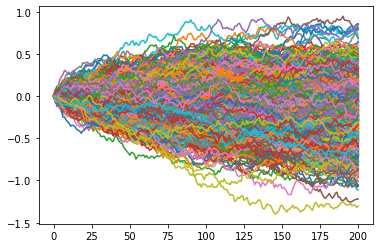

In [1299]:
df3.plot(legend=False)

<AxesSubplot:>

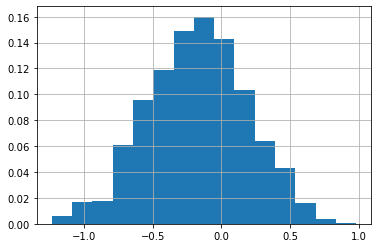

In [1356]:
df3.iloc[-1].hist(bins = 15, weights=np.zeros_like(df3.iloc[-1]) + 1. / df3.iloc[-1].size)

### b)

In [1162]:
m_2 = 500
T = 5

In [1128]:
def GMB(m, alpha, sigma, T):
    """
    computes geometric brownian motion
    """
    t = np.arange(0, T + T/m , T/m)
    nrand = r.standard_normal(m)
    S = list(range(0,m+1))
    S[0] = 1
    for i in range(1, m+1):
        S[i] = S[i-1] * np.exp(sigma*np.sqrt(t[i]-t[i-1])*nrand[i-1]+alpha*(t[i]-t[i-1]))
    S = np.vstack(S).tolist()
    S = [item for sublist in S for item in sublist]
    
    return S

In [1129]:
S = GMB(m_2, alpha, sigma, T)

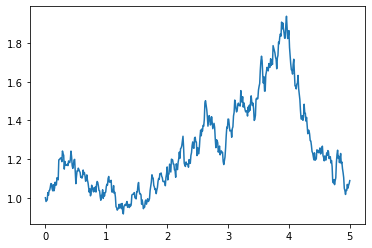

In [1130]:
plt.plot(t, S)

In [1132]:
f = {}
for j in range(1, 11):
    S = GMB(m_2, alpha, sigma, T)
    S = np.vstack(S).tolist() # from nparray to normal list
    S = [item for sublist in S for item in sublist] # from nparray to normal list
    f["BM{a}".format(a = j)] = S
df4 = pd.DataFrame(f)

<AxesSubplot:>

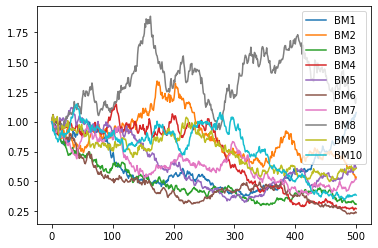

In [1133]:
df4.plot()

In [1134]:
print("Sample mean of 10 simulated GMB is: " + str(round(df4.iloc[-1].mean(), 3)))
print("Expected value of GBM with given parameters is: " + str(round(np.exp((alpha+sigma**2/2)*T), 3)))
print("Sample variance of 10 simulated GMB is: " + str(round(df4.iloc[-1].var(), 3)))
print("Variance of GBM with given parameters is: " + str(round(np.exp((alpha+sigma**2/2)*10)*(np.exp(sigma**2*5)-1), 3)))

Sample mean of 10 simulated GMB is: 0.576
Expected value of GBM with given parameters is: 0.709
Sample variance of 10 simulated GMB is: 0.106
Variance of GBM with given parameters is: 0.184


In [1252]:
f = {}
for j in range(1, 1001):
    S = GMB(m_2, alpha, sigma, T)
    S = np.vstack(S).tolist() # from nparray to normal list
    S = [item for sublist in S for item in sublist] # from nparray to normal list
    f["BM{a}".format(a = j)] = S
df5 = pd.DataFrame(f)

<AxesSubplot:>

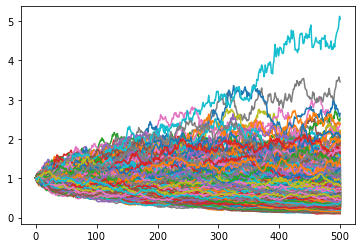

In [1136]:
df5.plot(legend = False)

In [1253]:
print("Sample mean of 1000 simulated GMB is: " + str(round(df5.iloc[-1].mean(), 3)))
print("Expected value of GBM with given parameters is: " + str(round(np.exp((alpha+sigma**2/2)*T), 3)))
print("Sample variance of 1000 simulated GMB is: " + str(round(df5.iloc[-1].var(), 3)))
print("Variance of GBM with given parameters is: " + str(round(np.exp((alpha+sigma**2/2)*10)*(np.exp(sigma**2*5)-1), 3)))

Sample mean of 1000 simulated GMB is: 0.704
Expected value of GBM with given parameters is: 0.709
Sample variance of 1000 simulated GMB is: 0.186
Variance of GBM with given parameters is: 0.184


### c)

In [1266]:
for i in [10, 100, 1000]:
    S = GMB(i, alpha, sigma, T)
    QV = sum(np.diff(S)**2)
    print("Quadratic variation of GBM with {a} time points is: ".format(a = i) + str(round(QV,3)))

Quadratic variation of GBM with 10 time points is: 0.138
Quadratic variation of GBM with 100 time points is: 0.116
Quadratic variation of GBM with 1000 time points is: 0.347


# Question 2

### a)

In [1286]:
stock = yf.download("JLL", start="2015-04-20", end="2021-04-20", period = 'd')

[*********************100%***********************]  1 of 1 completed


In [1272]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1511 entries, 2015-04-20 to 2021-04-19
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1511 non-null   float64
 1   High       1511 non-null   float64
 2   Low        1511 non-null   float64
 3   Close      1511 non-null   float64
 4   Adj Close  1511 non-null   float64
 5   Volume     1511 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 82.6 KB


In [1273]:
daily_returns = stock["Close"].pct_change().dropna()

<AxesSubplot:>

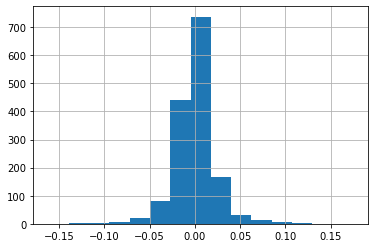

In [1274]:
daily_returns.hist(bins = 15)

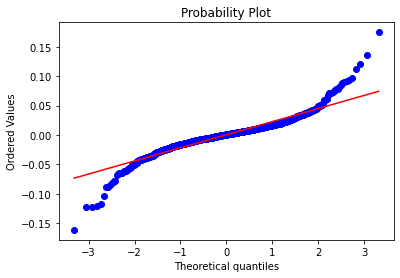

In [1366]:
stats.probplot(daily_returns, dist = 'norm', plot = pylab)
pylab.show()

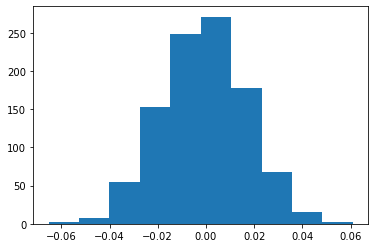

In [1365]:
plt.hist(np.diff(np.log(S)))
plt.show()

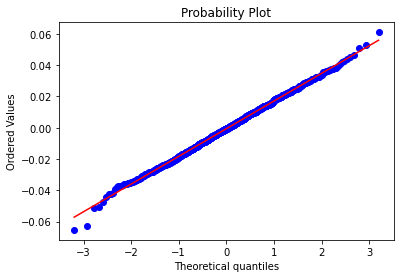

In [1367]:
stats.probplot(np.diff(np.log(S)), dist = 'norm', plot = pylab)
pylab.show()

In [1372]:
scipy.stats.shapiro(daily_returns)

ShapiroResult(statistic=0.8992879986763, pvalue=2.2177536580240698e-30)

In [1371]:
scipy.stats.shapiro(np.diff(np.log(S)))

ShapiroResult(statistic=0.9989646673202515, pvalue=0.8543965220451355)

In [1277]:
daily_returns.mean()

0.00033612117152619916

In [1278]:
daily_returns.var()

0.0005512398119954257

### b)

In [1279]:
# testing on paths from 1c.
for i in [10, 100, 1000]:
    S = GMB(i, alpha, sigma, T)
    daily_log_r = np.diff(np.log(S))
    sigma_est = sum(daily_log_r**2)/T
    print("Estimated stock price volatility of GBM with {a} time points is: ".format(a = i) + str(round(sigma_est,3)))

Estimated stock price volatility of GBM with 10 time points is: 0.053
Estimated stock price volatility of GBM with 100 time points is: 0.06
Estimated stock price volatility of GBM with 1000 time points is: 0.062


In [1287]:
# estimating stock price volatility for stock JLL
daily_log_r = np.diff(np.log(stock["Close"]))
sigma_est = sum(daily_log_r**2)/6
print("Estimated stock price volatility of JLL stock is: ".format(a = i) + str(round(sigma_est,3)))
# With more time points we should be getting closer to the true value of stock price volatility. 

Estimated stock price volatility of JLL stock is: 0.139
